Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
Cost at iteration 0: 0.6460214853286743
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455])

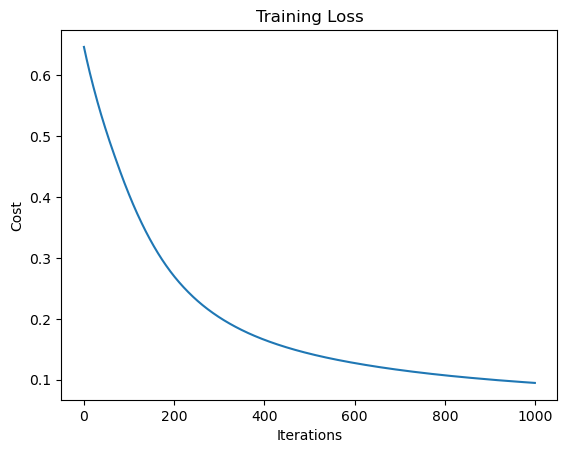

Test Accuracy: 0.9737


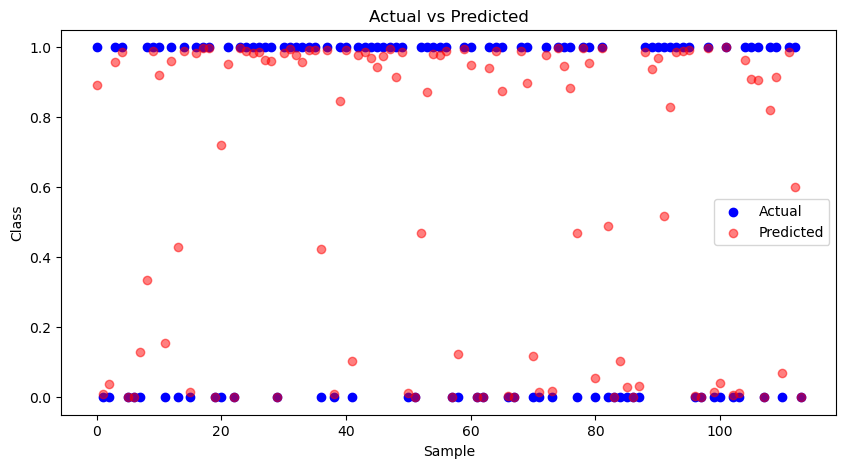

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
import torch
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nn import NeuralNetwork
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
layer_dims = [input_size, hidden_size, output_size]

# Create and train the model
model = NeuralNetwork(layer_dims)
costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.01)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

# Plot some predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred.squeeze().detach().numpy(), color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary.squeeze().numpy()))

Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
Cost at iteration 0: 0.7416471838951111
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455]), Y shape: torch.Size([1, 455])
AL shape: torch.Size([1, 455])

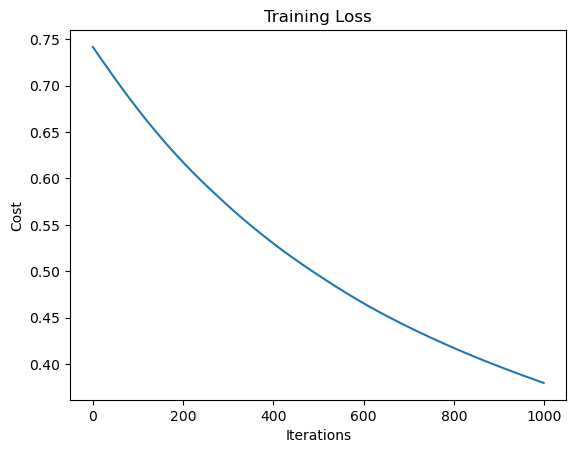

Test Accuracy: 0.9211


In [2]:
# training the model on gpu
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model = NeuralNetwork(layer_dims).to(device)

costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.001)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()


print(f"Test Accuracy: {accuracy.item():.4f}")

# Testing Softmax

tensor([[0.4598, 0.5402],
        [0.3022, 0.6978],
        [0.3078, 0.6922],
        [0.3817, 0.6183],
        [0.3307, 0.6693],
        [0.2853, 0.7147],
        [0.3044, 0.6956],
        [0.3091, 0.6909],
        [0.2441, 0.7559],
        [0.4006, 0.5994],
        [0.3034, 0.6966],
        [0.2227, 0.7773],
        [0.3919, 0.6081],
        [0.2244, 0.7756],
        [0.3268, 0.6732],
        [0.4441, 0.5559],
        [0.2186, 0.7814],
        [0.2946, 0.7054],
        [0.2268, 0.7732],
        [0.2969, 0.7031],
        [0.4370, 0.5630],
        [0.2904, 0.7096],
        [0.3734, 0.6266],
        [0.3326, 0.6674],
        [0.2463, 0.7537],
        [0.3187, 0.6813],
        [0.3710, 0.6290],
        [0.2834, 0.7166],
        [0.2822, 0.7178],
        [0.3884, 0.6116]])
Initial parameters:
W1:
tensor([[-0.3197,  0.0355],
        [-0.7570,  0.5301],
        [-0.3241, -0.2208]])

b1:
tensor([[0.],
        [0.],
        [0.]])

W2:
tensor([[-0.4631, -0.4880,  0.1292],
        [ 0.4734, -0

Epochs :   0%|          | 0/50 [00:00<?, ?it/s]

AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
Cost at iteration 0: 0.6638800501823425
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])
AL shape: torch.Size([2, 30]), Y shape: torch.Size([2, 30])


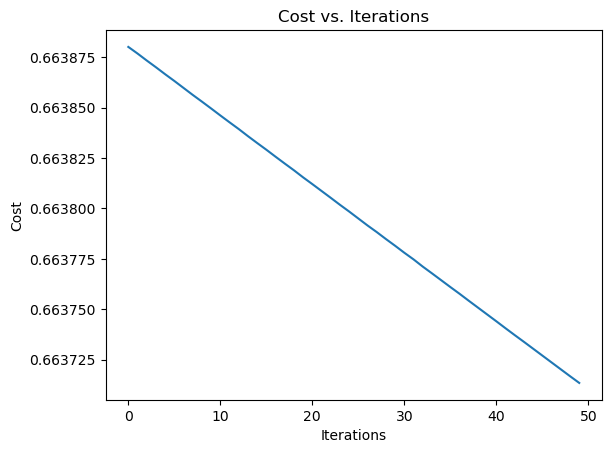

In [3]:
import torch 
from nn import NeuralNetwork
from sklearn.preprocessing import StandardScaler

# create 30 tensors of 2 random numbers
X = torch.rand(30, 2, dtype=torch.float)
actual_w = torch.rand(2, 2, dtype=torch.float)
actual_b = torch.rand(2, 1, dtype=torch.float)

y = torch.mm(X, actual_w) + actual_b.T
y = torch.softmax(y, dim=1)  # Apply softmax to get probabilities
print(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float)

layer_dims = [2, 3, 4, 3, 2]

model = NeuralNetwork(layer_dims)

print("Initial parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")
    

costs = model.train(X_scaled, y, num_iterations=50, learning_rate=0.01)

print("Final parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")

X_test = torch.tensor([[4, 8]], dtype=torch.float)  # 1 x 2 tensor
y_test = torch.mm(X_test, actual_w) + actual_b.T
y_test = torch.softmax(y_test, dim=1)
print("Expected Output: \n" + str(y_test))
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float)

print("Predicted data based on trained weights: ")
print("Input: \n" + str(X_test))
print("Output: \n" + str(model.predict(X_test_scaled)))

# Plot the cost over iterations
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()